Select one of the cases:3


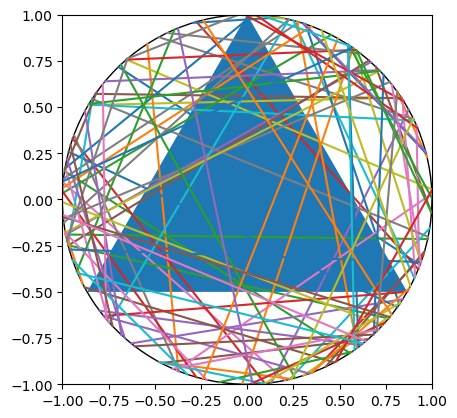

Select one of the cases:2


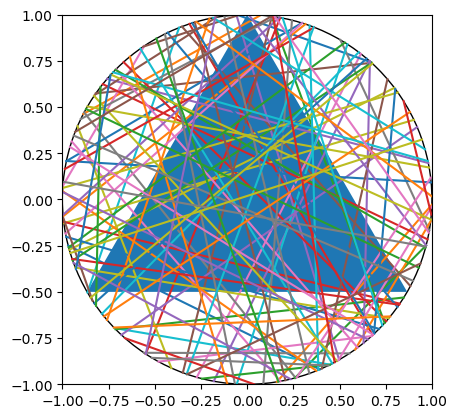

Select one of the cases:1


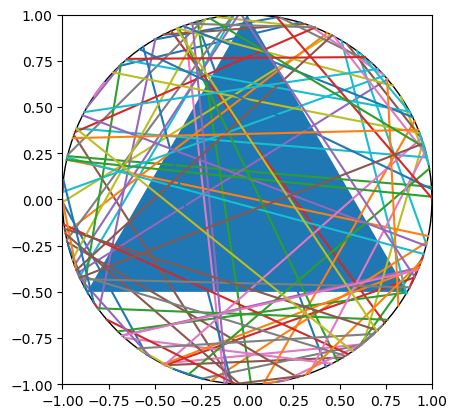

Select one of the cases:0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

RADIUS=1
CHORDS=100

def point_from_angle(radius, angle):
    return radius * np.array([np.cos(angle), np.sin(angle)])

def get_chord_length(chord):
    return np.linalg.norm(chord[0] - chord[1])

def first_case(radius):
    first_angle = np.random.rand() * 2 * np.pi
    second_angle = np.random.rand() * 2 * np.pi
    return np.array([point_from_angle(radius, first_angle), point_from_angle(radius, second_angle)])


def second_case(radius):
    radius_point_angle = np.random.rand() * 2 * np.pi
    radius_point = point_from_angle(radius, radius_point_angle)
    random_point = radius_point * np.random.rand()
    perpendicular_vector = np.array([radius_point[1], -radius_point[0]])
    perpendicular_vector /= np.linalg.norm(perpendicular_vector)
    d_random_point = np.linalg.norm(random_point)
    d_perpendicular = (radius ** 2 - d_random_point ** 2) ** 0.5
    return np.array([random_point - perpendicular_vector * d_perpendicular, random_point + perpendicular_vector * d_perpendicular])

def third_case(radius):
    random_point_r = np.random.rand() ** 0.5 * radius
    random_point_angle = np.random.rand() * 2 * np.pi
    random_point = point_from_angle(random_point_r, random_point_angle)
    perpendicular_vector = np.array([random_point[1], -random_point[0]])
    perpendicular_vector /= np.linalg.norm(perpendicular_vector)
    d_perpendicular = (radius ** 2 - random_point_r ** 2) ** 0.5
    return np.array([random_point - perpendicular_vector * d_perpendicular, random_point + perpendicular_vector * d_perpendicular])

def get_probability(sample_function):
    figure, axes = plt.subplots()
    axes.add_artist(plt.Circle((0, 0),1,fill=False))
    axes.add_artist(plt.Polygon([[0, 1], [3**0.5 * 0.5, -0.5], [-3**0.5 * 0.5, -0.5]])) # it draws the triangle
    count = 0
    for _ in range(CHORDS):
        chord = sample_function(RADIUS)
        plt.plot(chord[:, 0], chord[:, 1])
        if get_chord_length(chord) > RADIUS * 3 ** 0.5:
            count += 1
    axes.set_aspect(1)
    plt.xlim([-RADIUS, RADIUS])
    plt.ylim([-RADIUS, RADIUS])
    plt.show()
    return count / CHORDS

while True:
    option = int(input("Select one of the cases:"))
    if option == 1:
        get_probability(first_case)
    elif option == 2:
        get_probability(second_case)
    elif option == 3:
        get_probability(third_case)
    else:
        break
